In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df=pd.read_csv('train.csv')
df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


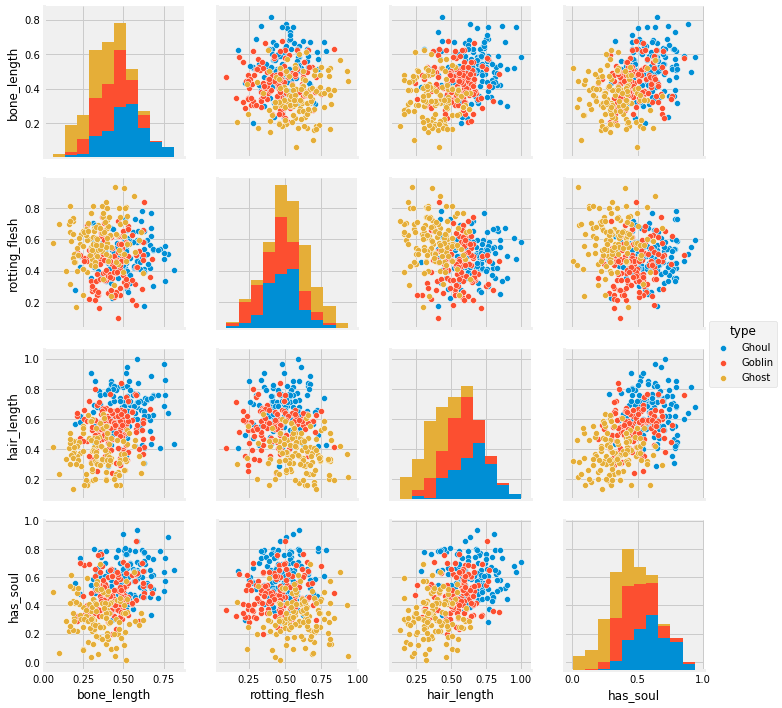

In [10]:
sns.pairplot(df[['bone_length','rotting_flesh',
                 'hair_length','has_soul','color','type']],hue='type')

They following pairs seem to seperate the classes:

1. hair_length and has_soul
2. bone_length and has_soul
3. bone_length and hair_length
4. rotting_flesh and has_soul
5. rotting_flesh and hair_length

we thus add new feature columns

In [15]:
df['hair_soul']=df['hair_length']*df['has_soul']
df['bone_soul']=df['bone_length']*df['has_soul']
df['bone_hair']=df['bone_length']*df['hair_length']
df['rotting_soul']=df['rotting_flesh']*df['has_soul']
df['rotting_hair']=df['rotting_flesh']*df['hair_length']

In [16]:
df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,hair_soul,bone_soul,bone_hair,rotting_soul,rotting_hair
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul,0.363825,0.276924,0.165118,0.274055,0.163407
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin,0.233763,0.253188,0.305853,0.187339,0.226307
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul,0.642171,0.370195,0.379735,0.280355,0.287580
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul,0.563196,0.686921,0.494546,0.449947,0.323937
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost,0.266409,0.360298,0.236973,0.557432,0.366630


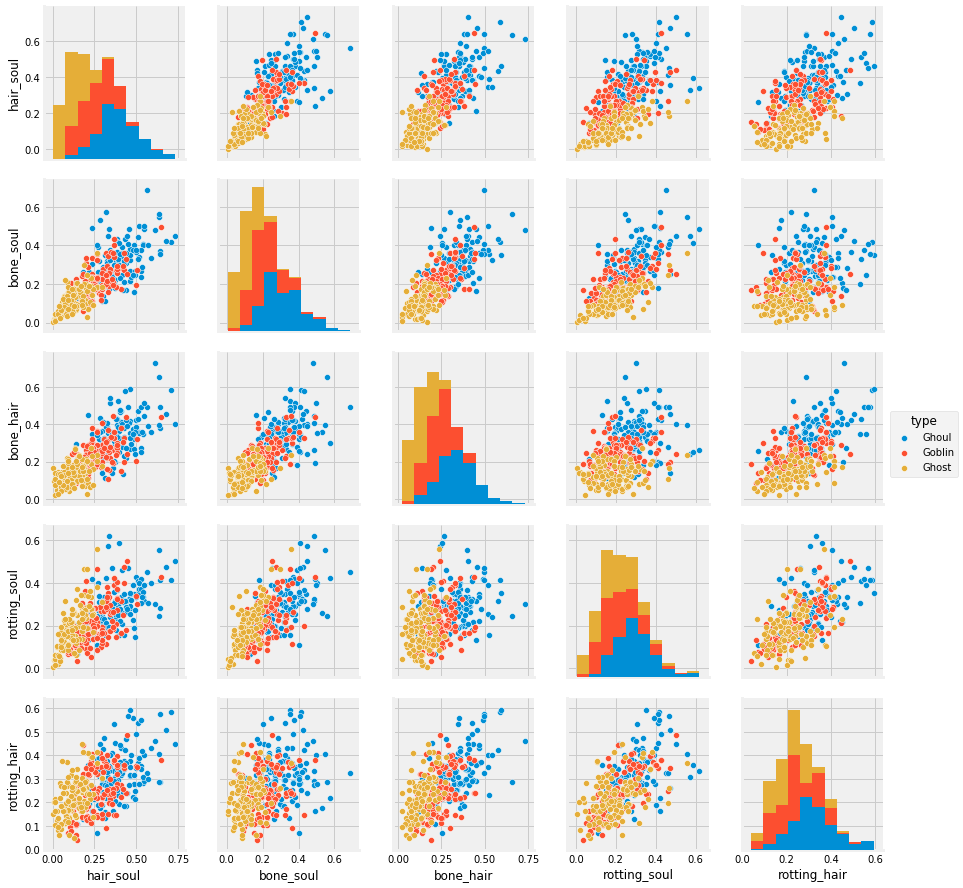

In [17]:
sns.pairplot(df[['hair_soul','bone_soul',
                 'bone_hair','rotting_soul','rotting_hair','type']],hue='type')

In [19]:
df.drop(['id','bone_length','rotting_flesh','hair_length',
         'has_soul','color'],1,inplace=True)

In [20]:
df.head()

,type,hair_soul,bone_soul,bone_hair,rotting_soul,rotting_hair
0,Ghoul,0.363825,0.276924,0.165118,0.274055,0.163407
1,Goblin,0.233763,0.253188,0.305853,0.187339,0.226307
2,Ghoul,0.642171,0.370195,0.379735,0.280355,0.287580
3,Ghoul,0.563196,0.686921,0.494546,0.449947,0.323937
4,Ghost,0.266409,0.360298,0.236973,0.557432,0.366630


In [22]:
X=df.drop(['type'],1)
y=df['type']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
clf=KNeighborsClassifier(n_neighbors=5)

In [28]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
clf.score(X_test,y_test)

0.7066666666666667

In [31]:
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
df2=pd.read_csv("test.csv")

In [55]:
df2.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [56]:
df2['hair_soul']=df2['hair_length']*df2['has_soul']
df2['bone_soul']=df2['bone_length']*df2['has_soul']
df2['bone_hair']=df2['bone_length']*df2['hair_length']
df2['rotting_soul']=df2['rotting_flesh']*df2['has_soul']
df2['rotting_hair']=df2['rotting_flesh']*df2['hair_length']

df3=df2.drop(['id','bone_length','rotting_flesh','hair_length',
         'has_soul','color'],1)

In [57]:
pred=clf.predict(df3)

In [58]:
df2['type']=pred

In [59]:
df2.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,hair_soul,bone_soul,bone_hair,rotting_soul,rotting_hair,type
0,3,0.471774,0.387937,0.706087,0.698537,black,0.493228,0.329552,0.333114,0.270988,0.273917,Ghoul
1,6,0.427332,0.645024,0.565558,0.451462,white,0.255328,0.192924,0.241681,0.291203,0.364798,Goblin
2,9,0.549602,0.491931,0.660387,0.449809,black,0.297048,0.247216,0.362950,0.221275,0.324865,Ghoul
3,10,0.638095,0.682867,0.471409,0.356924,white,0.168257,0.227752,0.300804,0.243732,0.321910,Ghoul
4,13,0.361762,0.583997,0.377256,0.276364,black,0.104260,0.099978,0.136477,0.161396,0.220317,Ghost


In [63]:
df2.to_csv('submission.csv',columns=['id','type'],index=False)